Email: crislanio.ufc@gmail.com, crislanio_macedo@medbloc.com.br

Blog pessoal - https://crislanio.wordpress.com/about

Medium - https://medium.com/sapere-aude-tech

Github - https://github.com/crislanio

Linkedin - https://www.linkedin.com/in/crislanio/

whatsapp: +55 88 997335880


# EDUSIM

 # Sumário
 

- <a href='#1'>1. Qual a média e mediana de activities realizadas por class, grade e level?</a>  
- <a href='#2'>2. Qual a média e mediana de points, badges, speaking tasks, quizzes total, feedback total por class, grade e level?</a>  


- <a href='#3'>3. Qual a média e mediana de ratings total por class, grade e level?</a>  
- <a href='#4'>4. Quem sao os 3 alunos com melhores resultados por cada grade e level?</a>  


- <a href='#5'>5 Qual a média e mediana de feedback total por class, grade e level?</a>  

- <a href='#6'>6 Existe correlação entre speaking total e quizzes? Justifique</a>  

- <a href='#7'>7 Existe correlação entre feedback e speaking tasks? Justifique</a>  

- <a href='#8'>8. Quais os dias e horários com maior índice de acertos das questões?</a>  
- <a href='#9'>9. Quais os dias e horários com maior índice de acertos das questões?</a>  

- <a href='#10'> 10. Quais os dias e horários com  menor índice de acertos das questões?</a>  

- <a href='#11'> 11. Insight 1,2,3</a>  



- Bibliotecas para leitura, tratamento e análises dos dados

In [1]:
from  sklearn.preprocessing  import  StandardScaler 
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns


from pandas import read_excel
from datetime import date
import pandas as pd
import numpy as np
%matplotlib inline


- ignorando warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

- Máximo de linhas e colunas para visualização

In [3]:
with pd.option_context("display.max_rows", 1000, "display.max_columns", 100):
        print(pd.get_option("display.max_rows"))
        print(pd.get_option("display.max_columns"))

1000
100


- Sheet name da planilha para analisar
- Leitura da planilha

In [5]:
my_sheet = 'Desempenho'
file_name = 'EDUSIMDataScience.xlsx' 
df = read_excel(file_name, sheet_name = my_sheet)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
CÓDIGO_Aluno      1000 non-null object
Class             1000 non-null object
Grade             982 non-null object
level             978 non-null object
Activities        1000 non-null int64
Badges            1000 non-null int64
In Class          1000 non-null int64
Points            1000 non-null int64
Speaking tasks    1000 non-null int64
Speaking skill    1000 non-null int64
Speaking total    1000 non-null object
Quizzes           1000 non-null int64
Quizzes skill     1000 non-null float64
Ratings           1000 non-null int64
Feedbacks         1000 non-null int64
dtypes: float64(1), int64(9), object(5)
memory usage: 117.3+ KB


- Colunas com letras maiúsculas

In [20]:
df.columns = [x.upper() for x in df.columns]

####  Dados Nulos

- As colunas LEVEL, GRADE possuem dados faltantes

<BarContainer object of 15 artists>

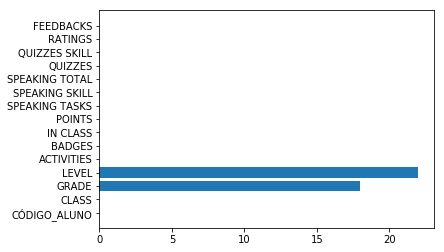

In [22]:
data = dict(df.isnull().sum())
group_data = list(data.values())
group_names = list(data.keys())

fig, ax = plt.subplots()
ax.barh(group_names, group_data)

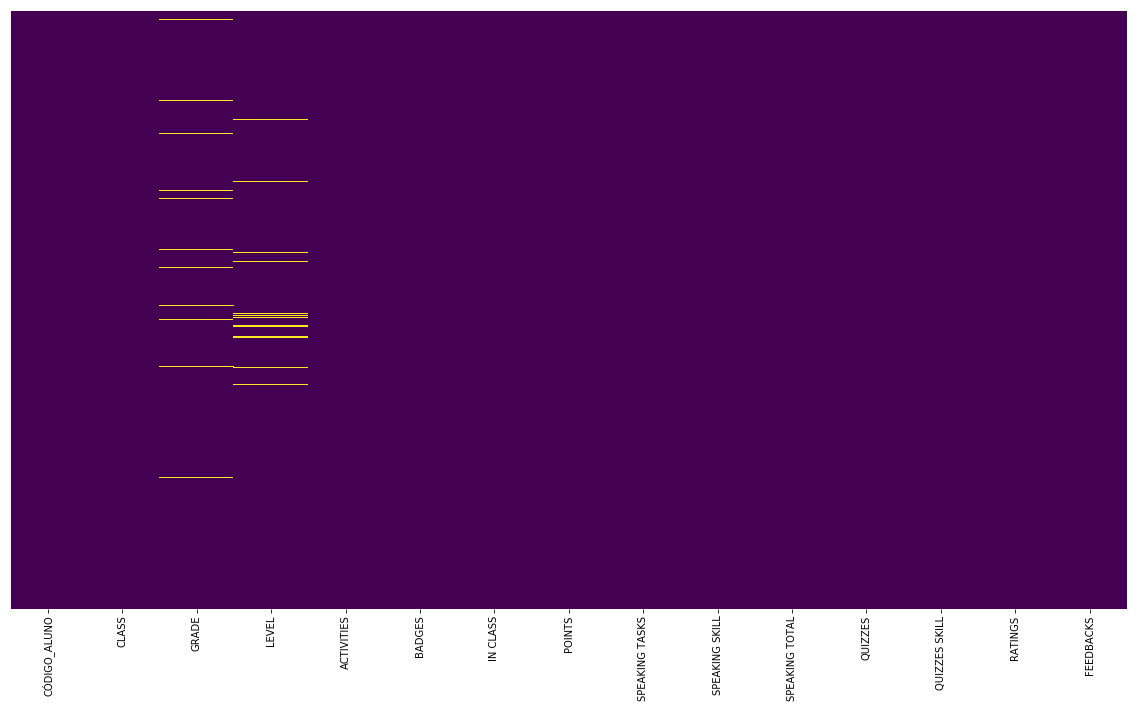

In [24]:
plt.figure(figsize=(20,11))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Imputação de dados faltantes

In [60]:
imp_mean = SimpleImputer(missing_values='#N/D', strategy='mean')  
# No nosso caso os dados nulos são identificados por #N/D e não np.nan

imp_moda = SimpleImputer(missing_values='#N/D', strategy='most_frequent')

DF_IMPUTE= pd.DataFrame(imp_moda.fit_transform(df[['LEVEL','GRADE']]))
DF_IMPUTE.columns = ['LEVEL','GRADE']
DF_IMPUTE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
LEVEL    1000 non-null object
GRADE    1000 non-null object
dtypes: object(2)
memory usage: 15.7+ KB


In [61]:
del df['LEVEL']
del df['GRADE']
df['LEVEL'] = DF_IMPUTE.LEVEL.values
df['GRADE']   = DF_IMPUTE.GRADE.values

- Gráfico com nenhum dados faltantes

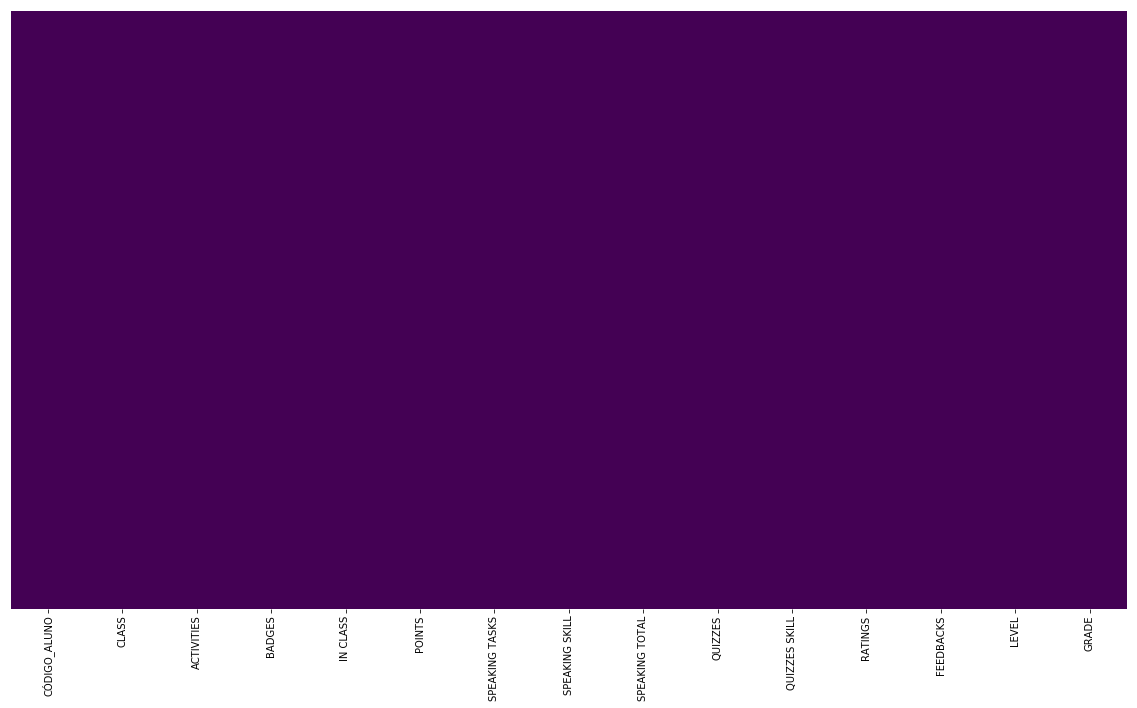

In [32]:
plt.figure(figsize=(20,11))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

- Salvando os dados tratados em um CSV

In [62]:
df.to_csv('EduSIMDataScience.csv',sep=",", index=False)

##### Resumo
- Foi feito imputação dos dados nulos em Desempenho substituindo pela ocorrência mais frequente
- Não foi excluído dados, nem colunas no conjunto de dados

# Final do tratamendo da planilha Desempenho

### Leitura dos dados

- Análise da planinha Estatística 

In [237]:
my_sheet = 'Estatísticas'
file_name = 'EDUSIMDataScience.xlsx' 
df2 = read_excel(file_name, sheet_name = my_sheet)
print('A planinha Estatística possui ', df2.shape[0], ' linhas e ',df2.shape[1], ' colunas')
print('\n')
df2.info()

A planinha Estatística possui  19964  linhas e  6  colunas


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19964 entries, 0 to 19963
Data columns (total 6 columns):
CODIGO_Aluno     19653 non-null object
Class            19961 non-null object
Activity Name    19961 non-null object
Type             19961 non-null object
Started          17039 non-null object
Skill            13651 non-null object
dtypes: object(6)
memory usage: 935.9+ KB


- Deixando as colunas com letras em maiúsculo 

In [238]:
# sns.heatmap(df.corr(), annot=True , cmap="YlGnBu")
df2.columns = [x.upper() for x in df2.columns]

# Dados Nulos

- % de dados faltantes por coluna 

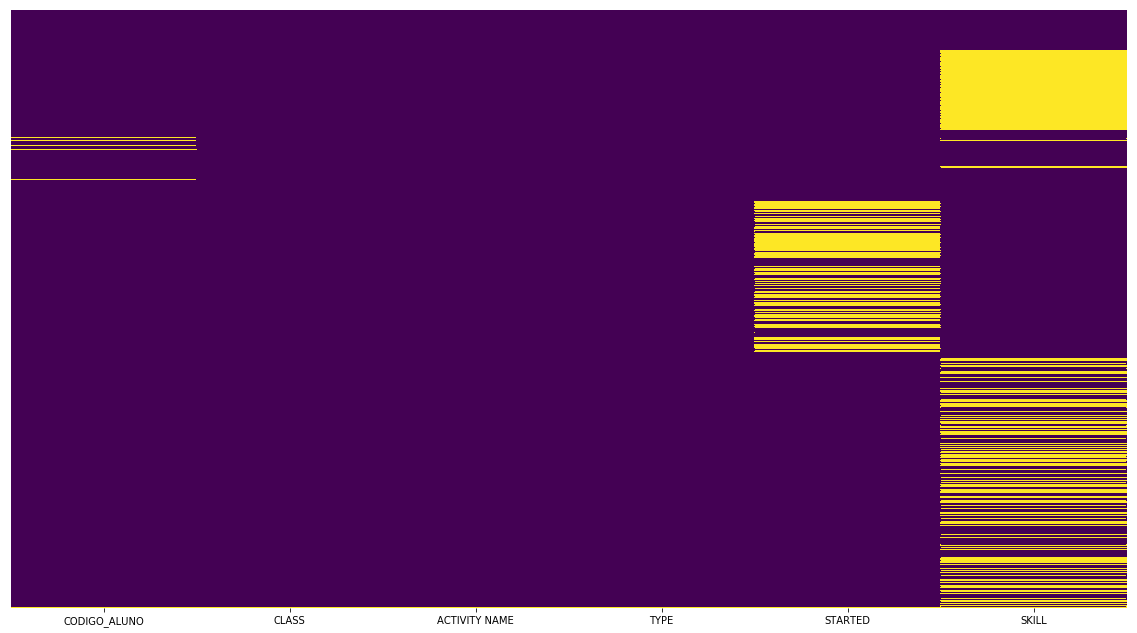

In [75]:
plt.figure(figsize=(20,11))
sns.heatmap(df2.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [77]:
total = df2.isnull().sum().sort_values(ascending = False)
percent = (df2.isnull().sum()/df2.isnull().count()*100).sort_values(ascending = False)
missing_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
SKILL,6313,31.621919
STARTED,2925,14.651372
CODIGO_ALUNO,311,1.557804
TYPE,3,0.015027
ACTIVITY NAME,3,0.015027
CLASS,3,0.015027


- Vamos excluir as linhas onde o CODIGO_ALUNO é nulo
- O restante das colunas não vão sofrer alterações

In [568]:
df2.head(2)

,CÓDIGO_ALUNO,CLASS,ACTIVITY NAME,TYPE,STARTED,SKILL,DATA GMT,DATA HORARIO,YEAR,MONTH,DAY
0,aluno33,oany5,Jobs,Vocabulary Quiz,2019-06-06 04:22 GMT-3,1,GMT-3,04:22,2019,06,06
1,aluno1,6ve7m,Sports areas,Vocabulary Quiz,2019-06-06 02:57 GMT-3,0.83,GMT-3,02:57,2019,06,06


In [570]:
df2['TYPE']=df2['TYPE'].astype('category')
df2['ACTIVITY NAME']=df2['ACTIVITY NAME'].astype('category')
df2['CLASS']=df2['CLASS'].astype('category')
df2['STARTED']=df2['STARTED'].astype('category')

- Removendo linhas onde o CODIGO_ALUNO é nulo


In [240]:
df2.dropna(subset=['CODIGO_ALUNO'],inplace=True)

- A planinha Estatística tinha  19964  linhas e  6  colunas, agora possue 19653  linhas e  6  colunas. 
- Foram removidas 311 linhas

- Separado a coluna STARTED em 5 novas colunas

In [242]:
df2["DATA GMT"]= df2["STARTED"].str.split(' ').str[2] 
df2["DATA HORARIO"]= df2["STARTED"].str.split(' ').str[1] 
df2["DATA"]= df2["STARTED"].str.split(' ').str[0] 
df2[['YEAR','MONTH','DAY']] = df2['DATA'].str.split('-',n=2, expand=True)
del df2["DATA"] 

- Renomeando a coluna CODIGO_ALUNO PARA CÓDUGO_ALUNO

In [259]:
df2.rename({'CODIGO_ALUNO':'CÓDIGO_ALUNO'}, axis=1, inplace=True)

In [260]:
df.shape, df2.shape

((1000, 17), (19653, 11))

In [261]:
df.columns, df2.columns

(Index(['CÓDIGO_ALUNO', 'CLASS', 'ACTIVITIES', 'BADGES', 'IN CLASS', 'POINTS',
        'SPEAKING TASKS', 'SPEAKING SKILL', 'SPEAKING TOTAL', 'QUIZZES',
        'QUIZZES SKILL', 'RATINGS', 'FEEDBACKS', 'LEVEL', 'GRADE', 'GRADE_NUM',
        'LEVEL_NUM'],
       dtype='object'),
 Index(['CÓDIGO_ALUNO', 'CLASS', 'ACTIVITY NAME', 'TYPE', 'STARTED', 'SKILL',
        'DATA GMT', 'DATA HORARIO', 'YEAR', 'MONTH', 'DAY'],
       dtype='object'))

###### Dataset final

- Juntando as planinhas Desempenho e Estatísticas

In [268]:
dataset = df2.merge(df, on = 'CÓDIGO_ALUNO', how = 'left')
print(dataset.shape)                                                         #   número de linhas, colunas
dataset.head()                                                               #   primeiras 5 linhas do conjunto de dados

(19653, 27)


,CÓDIGO_ALUNO,CLASS_x,ACTIVITY NAME,TYPE,STARTED,SKILL,DATA GMT,DATA HORARIO,YEAR,MONTH,...,SPEAKING SKILL,SPEAKING TOTAL,QUIZZES,QUIZZES SKILL,RATINGS,FEEDBACKS,LEVEL,GRADE,GRADE_NUM,LEVEL_NUM
0,aluno33,oany5,Jobs,Vocabulary Quiz,2019-06-06 04:22 GMT-3,1,GMT-3,04:22,2019,06,...,0,00:11:16,52,0.86,20,18,A2,9º ano,4,4
1,aluno1,6ve7m,Sports areas,Vocabulary Quiz,2019-06-06 02:57 GMT-3,0.83,GMT-3,02:57,2019,06,...,0,01:09:32,216,0.80,72,219,A1,9º ano,4,3
2,aluno1,6ve7m,Professional athletes,Vocabulary Quiz,2019-06-06 02:52 GMT-3,0.83,GMT-3,02:52,2019,06,...,0,01:09:32,216,0.80,72,219,A1,9º ano,4,3
3,aluno1,6ve7m,Types of sport,Vocabulary Quiz,2019-06-06 02:49 GMT-3,0.83,GMT-3,02:49,2019,06,...,0,01:09:32,216,0.80,72,219,A1,9º ano,4,3
4,aluno1,6ve7m,Literature in School,Vocabulary Quiz,2019-06-06 01:30 GMT-3,0.83,GMT-3,01:30,2019,06,...,0,01:09:32,216,0.80,72,219,A1,9º ano,4,3


- Salvando o dataset final em um arquivo CSV

In [271]:
dataset.to_csv('datasetFinalEDUSIM.csv', sep=',', index=False)

#### Resumo
- Foi feito remoção dos dados sem CODIGO_ALUNO
- Foi renomeado a coluna CODIGO_ALUNO para CÓDIGO_ALUNO


- Leitura dos dados
- Análise do dataset final

In [38]:
dataset = pd.read_csv('datasetFinalEDUSIM.csv', sep=',')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19653 entries, 0 to 19652
Data columns (total 27 columns):
CÓDIGO_ALUNO      19653 non-null object
CLASS_x           19653 non-null object
ACTIVITY NAME     19653 non-null object
TYPE              19653 non-null object
STARTED           16731 non-null object
SKILL             13445 non-null object
DATA GMT          14546 non-null object
DATA HORARIO      14546 non-null object
YEAR              14546 non-null float64
MONTH             14546 non-null float64
DAY               14546 non-null float64
CLASS_y           19653 non-null object
ACTIVITIES        19653 non-null int64
BADGES            19653 non-null int64
IN CLASS          19653 non-null int64
POINTS            19653 non-null int64
SPEAKING TASKS    19653 non-null int64
SPEAKING SKILL    19653 non-null int64
SPEAKING TOTAL    19653 non-null object
QUIZZES           19653 non-null int64
QUIZZES SKILL     19653 non-null float64
RATINGS           19653 non-null int64
FEEDBACKS      

- extraindo parte numérico de CÓDIGO_ALUNO_NUM

In [40]:
df['CÓDIGO_ALUNO_NUM'] = df.CÓDIGO_ALUNO.str.extract('(\d+)') # Número do aluno
dataset['CÓDIGO_ALUNO_NUM'] = dataset.CÓDIGO_ALUNO.str.extract('(\d+)') # Número do aluno


# - <a id='#1'>1. Qual a média e mediana de feedback total por class, grade e level?</a> 
###### - <a href='#8'> voltar ao sumário </a>  


In [417]:
df.groupby(['CLASS', 'GRADE','LEVEL']).apply(lambda x: (x.groupby(['CÓDIGO_ALUNO'])
                                      .sum() )
                                      ).agg({'FEEDBACKS':['median','mean','std']})


,FEEDBACKS
median,0.000000
mean,4.388000
std,17.796521


# Qual a média e mediana de ratings total por class, grade e level?

In [414]:

df.groupby(['CLASS', 'GRADE','LEVEL']).apply(lambda x: (x.groupby(['CÓDIGO_ALUNO'])
                                      .sum() )
                                      ).agg({'RATINGS':['median','mean','std']})

,RATINGS
median,0.000000
mean,2.524000
std,12.752806



# - <a id='#2'>2. Qual a média e mediana de points, badges, speaking tasks, quizzes total, feedback total por class, grade e level?</a> 
###### - <a href='#10'> voltar ao sumário </a>  


In [412]:
df.groupby(['CLASS', 'GRADE','LEVEL']).apply(lambda x: (x.groupby(['CÓDIGO_ALUNO'])
                                      .sum() )
                                      ).agg({'POINTS':['median','mean','std'], 'BADGES':['median','mean','std'], 'SPEAKING TASKS':['median','mean','std'], 'QUIZZES':['median','mean','std'], 'QUIZZES SKILL':['median','mean','std'],'FEEDBACKS':['median','mean','std']})

,POINTS,BADGES,SPEAKING TASKS,QUIZZES,QUIZZES SKILL,FEEDBACKS
median,55.00000,0.000000,0.00000,1.000000,0.250000,0.000000
mean,1548.20300,1.180000,8.87500,8.334000,0.319610,4.388000
std,6234.95704,4.790882,32.15365,22.482124,0.329812,17.796521




# - <a id='#3'>3. Qual a média e mediana de activities realizadas por class, grade e level?</a> 
###### - <a href='#10'> voltar ao sumário </a>  





In [413]:
df.groupby(['ACTIVITIES', 'CLASS', 'GRADE','LEVEL']).apply(lambda x: (x.groupby(['CÓDIGO_ALUNO'])
                                      .sum()
                                      .sort_values(['RATINGS'], ascending=False))
                                      ).agg({'RATINGS':['median','mean','std'], 'POINTS':['median','mean','std'], 'FEEDBACKS':['median','mean','std']})


,RATINGS,POINTS,FEEDBACKS
median,0.000000,55.00000,0.000000
mean,2.524000,1548.20300,4.388000
std,12.752806,6234.95704,17.796521


# - <a id='#4'>4. Quem são os 3 alunos com melhores resultados por cada grade e level?</a> 
###### - <a href='#10'> voltar ao sumário </a>  

In [367]:

df.groupby(['GRADE','LEVEL']).apply(lambda x: (x.groupby(['CÓDIGO_ALUNO'])
                                      .sum()
                                      .sort_values(['RATINGS'], ascending=False))
                                     .head(3))

ACTIVITIES  BADGES  IN CLASS  POINTS  \
GRADE        LEVEL  CÓDIGO_ALUNO                                         
6º ano       A0     aluno35               24       4         3   10228   
                    aluno31              103      19         3   14232   
                    aluno119              55       0         3    2575   
             A1     aluno27               65       0         5   15814   
                    aluno9               376      26         0   30142   
                    aluno7               372      26         0   31057   
             A2     aluno16              261      14         1   20645   
                    aluno11              141       2         0   24231   
                    aluno6               353      26         0   36936   
             B1     aluno302               6       0         0     298   
                    aluno207              11       0         0     794   
                    aluno231               7       0         0     600   
7º ano       A0     aluno41              116      22         0    8974   
                    aluno132              26       0         0    2030   
                    aluno87               61       0         0    3726   
             A1     aluno4               542      54         0   46255   
                    aluno21              260      30         0   19283   
                    aluno32              186       8         0   14172   
             A2     aluno116              33       1         0    2618   
                    aluno245              11       0         0     502   
             B1     aluno8               288       0         0   30670   
8º ano       #ERRO! aluno475               0       0         6      70   
             A0     aluno20              148      13         3   20310   
                    aluno86               39       1         2    3755   
                    aluno37              145      17         0   10105   
             A1     aluno29              207       0         0   14627   
                    aluno28              229      12         0   15745   
                    aluno30              177      22         0   14453   
             A2     aluno5               497      42         0   41092   
                    aluno12              295      41         0   24173   
                    aluno19              237      30         0   20313   
             B1     aluno38              129       4         0    9977   
                    aluno25              240      16         0   16772   
                    aluno43              106       0         0    8187   
9º ano       A0     aluno40              131      11         0    9482   
                    aluno114              50       1         0    2766   
                    aluno258               9       0         3     452   
             A1     aluno3               210      19         0   51029   
                    aluno2               579      43         0   93219   
                    aluno1               567      40         0  100997   
             A2     aluno26              208       7         0   16056   
                    aluno15              266      24         0   22213   
                    aluno33              139       2         0   11254   
             B1     aluno81               46       0         1    3891   
Ensino Médio A0     aluno410               0       0         2     100   
                    aluno412               0       0         2     100   
                    aluno413               0       0         2     100   
             A1     aluno319               0       0         3     250   
                    aluno433               0       0         2     100   
                    aluno654               0       0         1      19   
             A2     aluno311               5       0         1     269   
                    aluno369               0       0         3     150   
                    aluno428          

#### Computando correlação dos dados

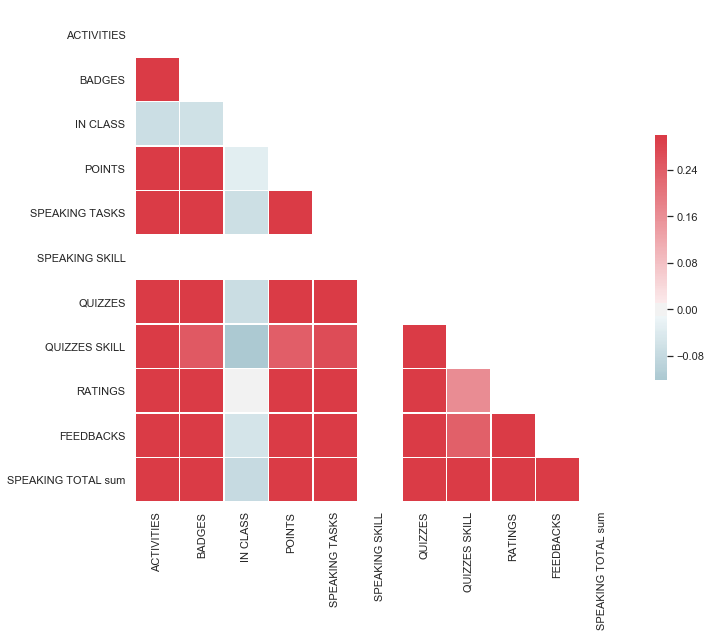

In [555]:
sns.set(style="white")
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# - <a id='#5'>5. Existe correlação entre speaking total e quizzes? Justifique</a> 
###### - <a href='#10'> voltar ao sumário </a>  




- Sim, e possitiva. A medida que o tempo falado em SPEAKING TOTAL aumenta, o n° de QUIZZES aumenta em média, 60%

In [554]:
# Calculando correlações no dataframe
corrs = df.corr()
corrs = corrs.sort_values('SPEAKING TOTAL sum', ascending = False)

# 10 maiores correlações positivas
pd.DataFrame(corrs['SPEAKING TOTAL sum'].head(10))

,SPEAKING TOTAL sum
SPEAKING TOTAL sum,1.000000
QUIZZES,0.613030
ACTIVITIES,0.586453
SPEAKING TASKS,0.550490
BADGES,0.491338
FEEDBACKS,0.486662
POINTS,0.474578
QUIZZES SKILL,0.460143
RATINGS,0.381673
IN CLASS,-0.079401


# Existe correlação entre feedback e speaking tasks? Justifique


- Sim, e possitiva. A medida que o n° de FEEDBACKS aumenta, o SPEAKING TASKS tende a aumentar

In [556]:
# Calculando correlações no dataframe
corrs = df.corr()
corrs = corrs.sort_values('FEEDBACKS', ascending = False)

# 10 maiores correlações positivas
pd.DataFrame(corrs['FEEDBACKS'].head(10))

,FEEDBACKS
FEEDBACKS,1.000000
SPEAKING TASKS,0.932073
ACTIVITIES,0.918764
POINTS,0.879232
QUIZZES,0.876030
BADGES,0.785166
RATINGS,0.544522
SPEAKING TOTAL sum,0.486662
QUIZZES SKILL,0.237829
IN CLASS,-0.054529


#####  Tratamento dos dados 

In [542]:
df['SPEAKING TOTAL seg']= df["SPEAKING TOTAL"].str.split(':').str[0]
df['SPEAKING TOTAL min']= df["SPEAKING TOTAL"].str.split(':').str[1]
df['SPEAKING TOTAL hour']= df["SPEAKING TOTAL"].str.split(':').str[2]

In [545]:
df['SPEAKING TOTAL seg']=pd.to_numeric(df['SPEAKING TOTAL seg'],errors='coerce')
df['SPEAKING TOTAL min']=pd.to_numeric(df['SPEAKING TOTAL min'],errors='coerce')
df['SPEAKING TOTAL hour']=pd.to_numeric(df['SPEAKING TOTAL hour'],errors='coerce')

In [546]:
df['SPEAKING TOTAL min'] = df['SPEAKING TOTAL min'] * 60
df['SPEAKING TOTAL hour'] = df['SPEAKING TOTAL hour'] * 120

In [551]:
df['SPEAKING TOTAL sum'] = df['SPEAKING TOTAL seg']+df['SPEAKING TOTAL min']+df['SPEAKING TOTAL hour']

del df["SPEAKING TOTAL seg"], df["SPEAKING TOTAL min"], df["SPEAKING TOTAL hour"] 

# - <a id='#6'>6. Quais os dias e horários com maior índice de acertos das questões?
</a> 
###### - <a href='#10'> voltar ao sumário </a>  






- Dias 25,30. Horários com maiores RATINGS 05:53  a 06:31

In [7]:
day_h_aluno = dataset.groupby(['RATINGS','DAY', 'DATA HORARIO'])
day_h_aluno.size().sort_values(ascending=False)

RATINGS  DAY   DATA HORARIO
15       25.0  05:55           4
17       1.0   12:54           4
13       30.0  06:31           4
15       24.0  03:20           4
24       25.0  04:57           4
15       25.0  05:53           4
2        27.0  07:54           3
24       5.0   09:57           3
               09:42           3
15       24.0  02:57           3
               02:59           3
24       24.0  08:44           3
         5.0   09:27           3
         26.0  12:26           3
         5.0   09:20           3
15       24.0  03:22           3
               03:28           3
24       26.0  12:28           3
17       2.0   11:49           3
               11:52           3
3        29.0  02:39           3
24       5.0   10:22           3
0        26.0  09:02           3
24       5.0   10:25           3
323      25.0  01:49           3
24       25.0  11:13           3
         5.0   10:42           3
               10:43           3
         25.0  11:09           3
323      26.0  

# - <a id='#7'>7. Quais os dias e horários com menor índice de acertos das questões?
</a> 
###### - <a href='#10'> voltar ao sumário </a>  


- Dias 1,23. Horários com menores RATINGS 06:15  a 07:04

In [6]:
day_h_aluno = dataset.groupby(['RATINGS','DAY', 'DATA HORARIO'])
day_h_aluno.size().sort_values(ascending=True)

RATINGS  DAY   DATA HORARIO
0        1.0   06:28           1
23       23.0  06:25           1
               06:26           1
               06:27           1
               06:29           1
               06:31           1
               06:32           1
               06:34           1
               06:36           1
               06:41           1
               06:46           1
               06:47           1
               06:51           1
               06:53           1
               06:55           1
               06:56           1
               06:57           1
               06:59           1
               07:00           1
               07:01           1
               07:03           1
               07:04           1
               06:23           1
               06:22           1
               06:20           1
               06:17           1
               05:15           1
               05:17           1
               05:18           1
               

# Engenharia de features - baseline final

In [41]:
dataset['SPEAKING TOTAL seg']= dataset["SPEAKING TOTAL"].str.split(':').str[0]
dataset['SPEAKING TOTAL min']= dataset["SPEAKING TOTAL"].str.split(':').str[1]
dataset['SPEAKING TOTAL hour']= dataset["SPEAKING TOTAL"].str.split(':').str[2]

dataset['SPEAKING TOTAL seg']=pd.to_numeric(dataset['SPEAKING TOTAL seg'],errors='coerce')
dataset['SPEAKING TOTAL min']=pd.to_numeric(dataset['SPEAKING TOTAL min'],errors='coerce')
dataset['SPEAKING TOTAL hour']=pd.to_numeric(dataset['SPEAKING TOTAL hour'],errors='coerce')

dataset['SPEAKING TOTAL min'] = dataset['SPEAKING TOTAL min'] * 60
dataset['SPEAKING TOTAL hour'] = dataset['SPEAKING TOTAL hour'] * 120
dataset['SPEAKING TOTAL sum_(eng)'] = dataset['SPEAKING TOTAL seg']+dataset['SPEAKING TOTAL min']+dataset['SPEAKING TOTAL hour']
del dataset["SPEAKING TOTAL seg"], dataset["SPEAKING TOTAL min"], dataset["SPEAKING TOTAL hour"] 

- a feature DATA HORARIO foi transformada em uma feature com um somatório dos segundos. Exemplo, 02:40 dá um total de 160 segundos

In [42]:
dataset['DATA HORARIO seg']= dataset["DATA HORARIO"].str.split(':').str[0]
dataset['DATA HORARIO min']= dataset["DATA HORARIO"].str.split(':').str[1]

dataset['DATA HORARIO min'] = dataset['DATA HORARIO min'] * 60

dataset['DATA HORARIO sum(eng)'] = dataset['DATA HORARIO seg']+dataset['DATA HORARIO min']
del dataset["DATA HORARIO seg"], dataset["DATA HORARIO min"] 

- Transformando algumas variáveis em númericas

In [43]:
dataset['CÓDIGO_ALUNO_NUM(eng)'] = pd.factorize(dataset.CÓDIGO_ALUNO, sort=True)[0] + 1 
dataset['CLASS_x_NUM(eng)'] = pd.factorize(dataset.CLASS_x, sort=True)[0] + 1 
dataset['CLASS_y_NUM(eng)'] = pd.factorize(dataset.CLASS_x, sort=True)[0] + 1 

dataset['ACTIVITY NAME_NUM(eng)'] = pd.factorize(dataset['ACTIVITY NAME'], sort=True)[0] + 1 
dataset['TYPE_NUM(eng)'] = pd.factorize(dataset.TYPE, sort=True)[0] + 1 
dataset['DATA HORARIO(eng)'] = pd.factorize(dataset.TYPE, sort=True)[0] + 1 

- Selecionando as variáveis para criar o modelo de machine learning base.

In [44]:
# SELECAO_COLUNAS_X = ['CÓDIGO_ALUNO_NUM(eng)','POINTS', 'RATINGS','FEEDBACKS', 'GRADE_NUM','LEVEL_NUM','SPEAKING TOTAL sum_(eng)']
SELECAO_COLUNAS_X = ['CÓDIGO_ALUNO_NUM(eng)','CLASS_x_NUM(eng)', 'CLASS_y_NUM(eng)', 'ACTIVITY NAME_NUM(eng)',
       'TYPE_NUM(eng)', 'YEAR','MONTH', 'DAY', 'ACTIVITIES', 'BADGES','IN CLASS', 'POINTS', 'SPEAKING TASKS','SPEAKING SKILL',
        'QUIZZES', 'QUIZZES SKILL','RATINGS','FEEDBACKS', 'GRADE_NUM','LEVEL_NUM','SPEAKING TOTAL sum_(eng)','DATA HORARIO(eng)']

SELECAO_COLUNAS_Y = ['SKILL']


- Tratamento dados nulos

In [45]:
dataset.update( dataset['SKILL'].fillna(0) )
dataset.update( dataset['YEAR'].fillna(0) )
dataset.update( dataset['MONTH'].fillna(0) )
dataset.update( dataset['DAY'].fillna(0) )

- Treinamento do modelo

In [46]:
dataset['CÓDIGO_ALUNO_NUM(eng)'] = pd.to_numeric(dataset['CÓDIGO_ALUNO_NUM(eng)'],errors='coerce')

dataset['CLASS_x_NUM(eng)'] =pd.to_numeric(dataset['CLASS_x_NUM(eng)'],errors='coerce')

dataset['CLASS_y_NUM(eng)'] = pd.to_numeric(dataset['CLASS_x_NUM(eng)'],errors='coerce')
dataset['ACTIVITY NAME_NUM(eng)'] = pd.to_numeric(dataset['ACTIVITY NAME_NUM(eng)'],errors='coerce')
dataset['TYPE_NUM(eng)'] = pd.to_numeric(dataset['TYPE_NUM(eng)'],errors='coerce')
dataset['YEAR'] = pd.to_numeric(dataset['YEAR'],errors='coerce')
dataset['MONTH'] = pd.to_numeric(dataset['MONTH'],errors='coerce')
dataset['DAY'] = pd.to_numeric(dataset['DAY'],errors='coerce')
dataset['ACTIVITIES'] = pd.to_numeric(dataset['ACTIVITIES'],errors='coerce')
dataset['BADGES'] = pd.to_numeric(dataset['BADGES'],errors='coerce')
dataset['IN CLASS'] = pd.to_numeric(dataset['IN CLASS'],errors='coerce')
dataset['POINTS'] = pd.to_numeric(dataset['POINTS'],errors='coerce')
dataset['SPEAKING TASKS'] = pd.to_numeric(dataset['SPEAKING TASKS'],errors='coerce')
dataset['SPEAKING SKILL'] = pd.to_numeric(dataset['SPEAKING SKILL'],errors='coerce')
dataset['QUIZZES']  =pd.to_numeric(dataset['QUIZZES'],errors='coerce')
dataset['QUIZZES SKILL'] = pd.to_numeric(dataset['QUIZZES SKILL'],errors='coerce')
dataset['RATINGS'] = pd.to_numeric(dataset['RATINGS'],errors='coerce')
dataset['FEEDBACKS'] = pd.to_numeric(dataset['FEEDBACKS'],errors='coerce')
dataset['GRADE_NUM'] = pd.to_numeric(dataset['GRADE_NUM'],errors='coerce')
dataset['LEVEL_NUM'] = pd.to_numeric(dataset['LEVEL_NUM'],errors='coerce')
dataset['SPEAKING TOTAL sum_(eng)'] = pd.to_numeric(dataset['SPEAKING TOTAL sum_(eng)'],errors='coerce')
dataset['DATA HORARIO(eng)'] = pd.to_numeric(dataset['DATA HORARIO(eng)'],errors='coerce')

In [47]:
dataset['SKILL'] = pd.to_numeric(dataset['SKILL'],errors='coerce')

In [207]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer

dataset.dropna(axis=0, subset=['SKILL'], inplace=True)
y = dataset.SKILL
X = dataset.drop(['SKILL'], axis=1).select_dtypes(exclude=['object'])
train_X, test_X, train_y, test_y = train_test_split(X.as_matrix(), y.as_matrix(), test_size=0.25)

my_imputer = Imputer()
train_X = my_imputer.fit_transform(train_X)
test_X = my_imputer.transform(test_X)

In [210]:
# Instalando xgboost
# !pip install xgboost

In [230]:
from xgboost import XGBRegressor

my_model = XGBRegressor()
# Add silent = True para evitar a impressão de atualizações em cada ciclo
my_model.fit(train_X, train_y, verbose=False)

[13:17:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

- O erro de predição da SKILL para um aluno é de até 3.850%

In [231]:
# fazendo predições
predictions = my_model.predict(test_X)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_y)))

Mean Absolute Error : 3.850222986393165


In [232]:
my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(train_X, train_y, early_stopping_rounds=5, 
             eval_set=[(test_X, test_y)], verbose=False)

[13:17:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

# - <a id='#8'>8. Insight 1</a> 
###### - <a href='#10'> voltar ao sumário </a> 

- Um modelo simples para prever a SKILL do aluno retorna um erro de aproximadamento 3.7%

- O erro de predição da SKILL para um aluno é de até 3.7422%

In [233]:
# fazendo predições
predictions = my_model.predict(test_X)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_y)))

Mean Absolute Error : 3.742223252052207


# - <a id='#9'>9. Insight 2</a> 
###### - <a href='#10'> voltar ao sumário </a> 

- A skill com maior resultado tem TYPE Vocabulary Quiz

- O TYPE com mais testes são do tipo  Speaking Task e Pick a pic


In [62]:
typw_skill = dataset.groupby(['SKILL', 'TYPE'])
typw_skill.size().sort_values(ascending=True)

SKILL  TYPE           
0.94   Vocabulary Quiz       1
0.22   Vocabulary Quiz       1
0.92   Vocabulary Quiz       1
0.08   Vocabulary Quiz       1
0.56   Vocabulary Quiz       1
0.11   Vocabulary Quiz       1
0.61   Vocabulary Quiz       1
0.39   Vocabulary Quiz       2
0.28   Vocabulary Quiz       2
0.42   Vocabulary Quiz       2
0.78   Vocabulary Quiz       3
0.72   Vocabulary Quiz       4
0.20   Dialogue Quiz         6
0.25   Listening Quiz        6
0.00   Listening Quiz        8
0.10   Vocabulary Quiz       9
0.20   Listening Quiz       11
0.17   Listening Quiz       19
0.60   Dialogue Quiz        19
0.40   Vocabulary Quiz      20
0.20   Vocabulary Quiz      23
0.30   Vocabulary Quiz      24
0.25   Grammar Quiz         24
0.13   Dialogue Quiz        24
0.00   Dialogue Quiz        25
0.60   Vocabulary Quiz      26
0.17   Dialogue Quiz        27
0.75   Dialogue Quiz        27
0.40   Listening Quiz       27
       Dialogue Quiz        29
                          ... 
0.43   Dialogue 

# - <a id='#10'>10. Insight 3</a> 
###### - <a href='#10'> voltar ao sumário </a> 

- O ACTIVITY NAME com mais testes são do tipo Japan and Exercise                       

In [63]:
typw_act = dataset.groupby(['ACTIVITY NAME', 'TYPE'])
typw_act.size().sort_values(ascending=False)

ACTIVITY NAME                  TYPE                  
Japan                          Dialogue Quiz             302
Exercise                       Vocabulary Quiz           294
Conversation at Starbucks      Dialogue Quiz             229
Australia                      Dialogue Quiz             201
Korea                          Dialogue Quiz             194
Places in NYC                  Vocabulary Quiz           187
Japan                          Speaking Task             185
Australia                      Speaking Task             151
Food                           Vocabulary Quiz           140
How much/how many              Grammar Quiz              135
Favorites                      Speaking Task             129
Places in NYC                  Instructional             126
Korea                          Speaking Task             123
Panama                         Dialogue Quiz             121
American Greetings             Listening Quiz            120
Drinks                         

# Final